/Users/matthewlee/Desktop/venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


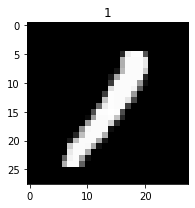

In [1]:
import matplotlib.pyplot as plt
import torch
import torchvision

transform = torchvision.transforms.Compose([
                           torchvision.transforms.ToTensor(),
                           torchvision.transforms.Normalize(0.1307, 0.3081)])

train_data = torchvision.datasets.MNIST('./datafiles/', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)

test_data = torchvision.datasets.MNIST('./datafiles/', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=1000, shuffle=True)


# the code below just plots an example input (you don't need it to train the network)
batch = enumerate(train_loader)
batch_idx, (batch_inputs, batch_targets) = next(batch)
plt.figure(figsize=(4,3))
plt.imshow(batch_inputs[0, 0, :, :], cmap='gray')
plt.title(batch_targets[0].numpy())
plt.tight_layout()
plt.show()


In [14]:
train_data[0][1]

5

In [62]:
import torch.nn as nn
class MLP(nn.Module):
    def __init__(self):
        super(MLP,self).__init__()
        self.convs = torch.nn.Sequential()
        self.convs.append(nn.Linear(784,100))
        self.convs.append(nn.Linear(100,10))
        self.ReLU = nn.ReLU()
        
    def forward(self, x):
        for conv in self.convs[:-1]:
            x = torch.flatten(x,1)
            x = conv(x)
            x = self.ReLU(x)
        
        conv = self.convs[-1]
        x = torch.flatten(x,1)
        x = conv(x)
        
        return x

In [96]:
from tqdm import tqdm
import numpy as np

def train():
    
    clf = MLP()
    optimizer = torch.optim.Adam(clf.parameters(),lr=1e-3)
    criterion = torch.nn.CrossEntropyLoss()
    
    for epoch in tqdm(range(5)):
        
        running_loss = 0
        
        for i, data in enumerate(train_loader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            
            optimizer.zero_grad()
            output = clf(inputs)
            loss = criterion(output,labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            
        print('Epoch: ', epoch, ', Loss: ', running_loss/(i+1))
    return clf
        

In [91]:
def test(model):
    clf = model
    criterion = torch.nn.CrossEntropyLoss()
    running_loss = 0
    for i, data in enumerate(test_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        output = clf(inputs)
        loss = criterion(output,labels)
        running_loss += loss.item()
    print(running_loss/(i+1))
    print(testAccuracy(model))

In [92]:
def testAccuracy(model):
    
    model.eval()
    accuracy = 0.0
    total = 0.0
    
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            # run the model on the test set to predict labels
            outputs = model(images)
            # the label with the highest energy will be our prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            accuracy += (predicted == labels).sum().item()
    
    # compute the accuracy over all test images
    accuracy = (100 * accuracy / total)
    return(accuracy)

In [97]:
model = train()
test(model)

 20%|█████████                                    | 1/5 [00:02<00:10,  2.68s/it]

Epoch:  0 , Loss:  0.26754491950180737


 40%|██████████████████                           | 2/5 [00:05<00:07,  2.61s/it]

Epoch:  1 , Loss:  0.12155512526238174


 60%|███████████████████████████                  | 3/5 [00:07<00:05,  2.60s/it]

Epoch:  2 , Loss:  0.08467243495943354


 80%|████████████████████████████████████         | 4/5 [00:10<00:02,  2.56s/it]

Epoch:  3 , Loss:  0.06546223201929952


100%|█████████████████████████████████████████████| 5/5 [00:12<00:00,  2.57s/it]

Epoch:  4 , Loss:  0.05259684910392091


0.07581154555082321
97.81
